In [1]:
#%matplotlib inline
#%matplotlib notebook
#%matplotlib widget


# Slider

In this example, sliders are used to control the frequency and amplitude of
a sine wave.

See :doc:`/gallery/widgets/slider_snap_demo` for an example of having
the ``Slider`` snap to discrete values.

See :doc:`/gallery/widgets/range_slider` for an example of using
a ``RangeSlider`` to define a range of values.


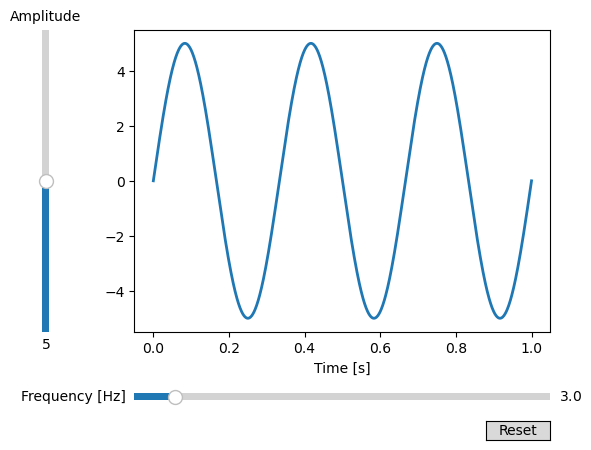

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import mpld3 as pl
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)


plt.show()

html_str = mpld3.fig_to_html(fig)
Html_file= open("prova_slider.html","w")
Html_file.write(html_str)
Html_file.close()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.widgets.Button`
   - `matplotlib.widgets.Slider`

